In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

import dask
#from dask.distributed import performance_report, Client, progress

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

In [2]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

NameError: name 'fsspec' is not defined

In [3]:
print(f'Slicing Data')

data = ds_sst['analysed_sst'].sel(time=slice('2010-01-01', '2023-01-01'),
                                  lat=slice(12.0, 12.34),
                                  lon=slice(-68.48, -68.17)
                                  ).load() - 273.14

data.plot()

Slicing Data


NameError: name 'ds_sst' is not defined

In [4]:
# Save Data to netCDF File
print(f'Saving Data to netCDF File')
data.to_netcdf('sst1.nc')

Saving Data to netCDF File


NameError: name 'data' is not defined

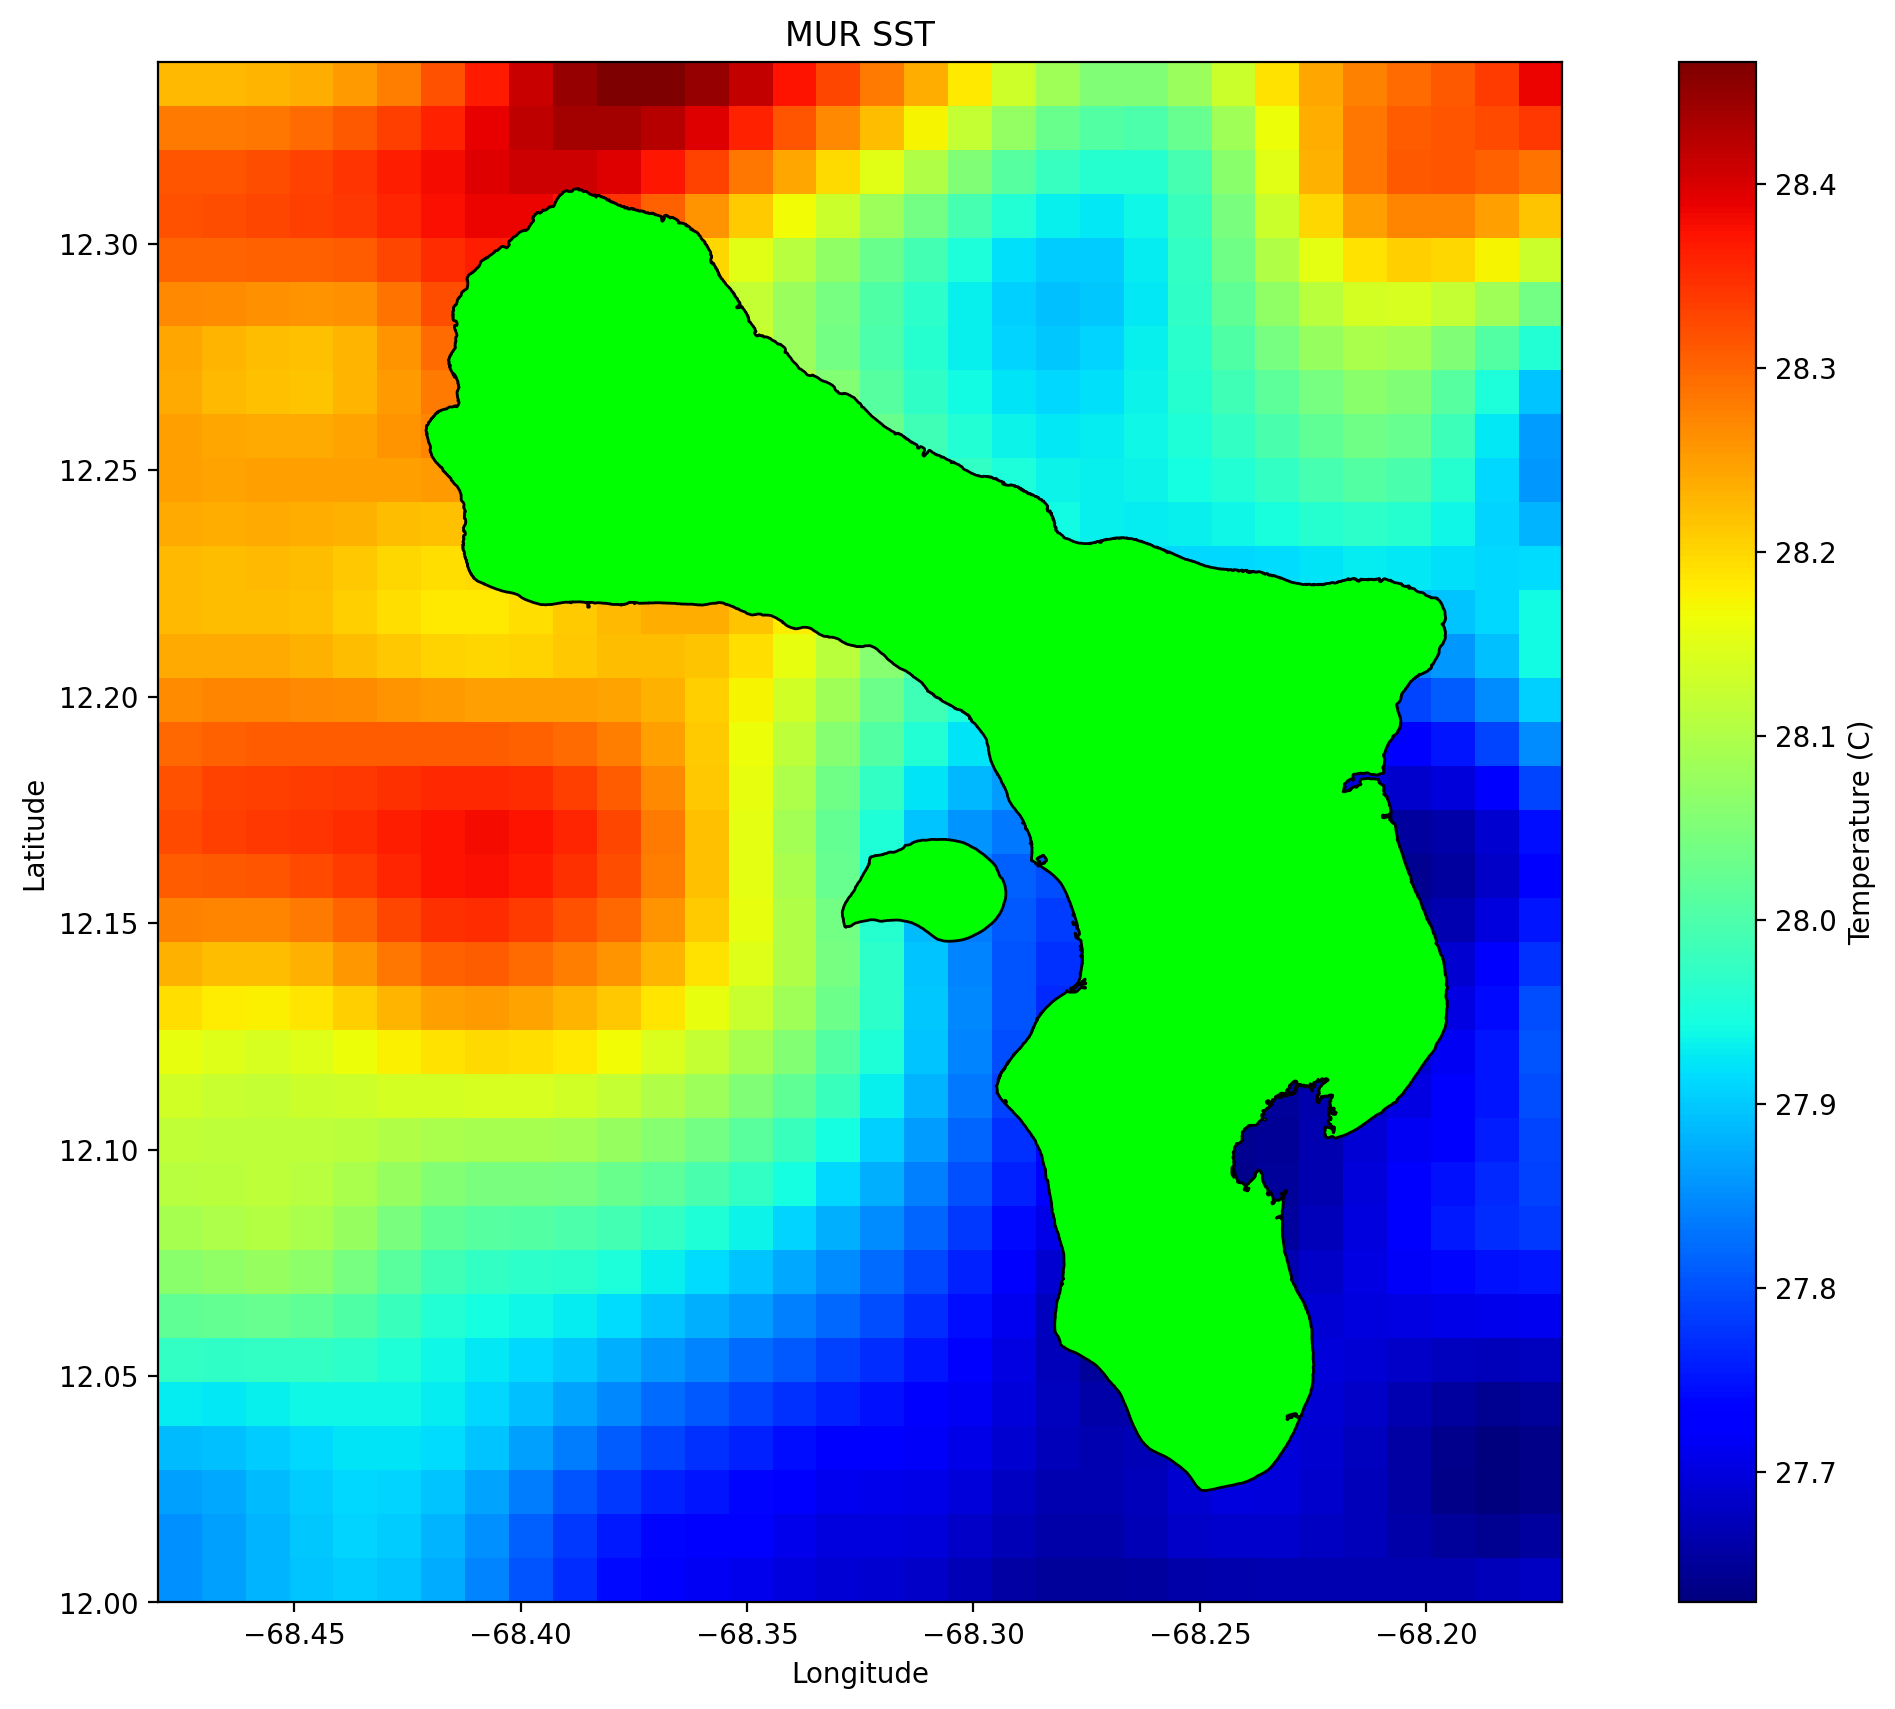

In [ ]:
# Importing Plotting Libraries
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import numpy as np

# Loads the data
nc = xr.open_dataset('sst.nc')

# Slices to show only data from 2010-05-05
nc = nc.sel(time='2010-05-05')

# Create plot with multiple subplots
fig, ax = plt.subplots(1,1, figsize=(15,10))

# Loads Shape File
shape = gpd.read_file('../shapeFiles/BON_Coastline.shp')

# Sets Label Ranges
x_range = np.arange(-68.48, -68.17, 0.01).round(2)
y_range = np.arange(12.0, 12.35, 0.01).round(2)[::-1]

# Sets Limits
ax.set_xlim(x_range.min(), x_range.max())
ax.set_ylim(y_range.min(), y_range.max())

# Sets the Title
ax.set_title('MUR SST')

# Sets Axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Plots the Shape File
shape.plot(ax=ax, color='lime', edgecolor='black', zorder=3)

# Generate the heatmap
plt.imshow(nc.analysed_sst[0,:,:]-273.14, extent=[x_range.min(), x_range.max(), y_range.min(), y_range.max()], 
           alpha=1, zorder=2, cmap='jet')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Temperature (C)')

plt.show()


<Axes: title={'center': 'MUR SST'}>

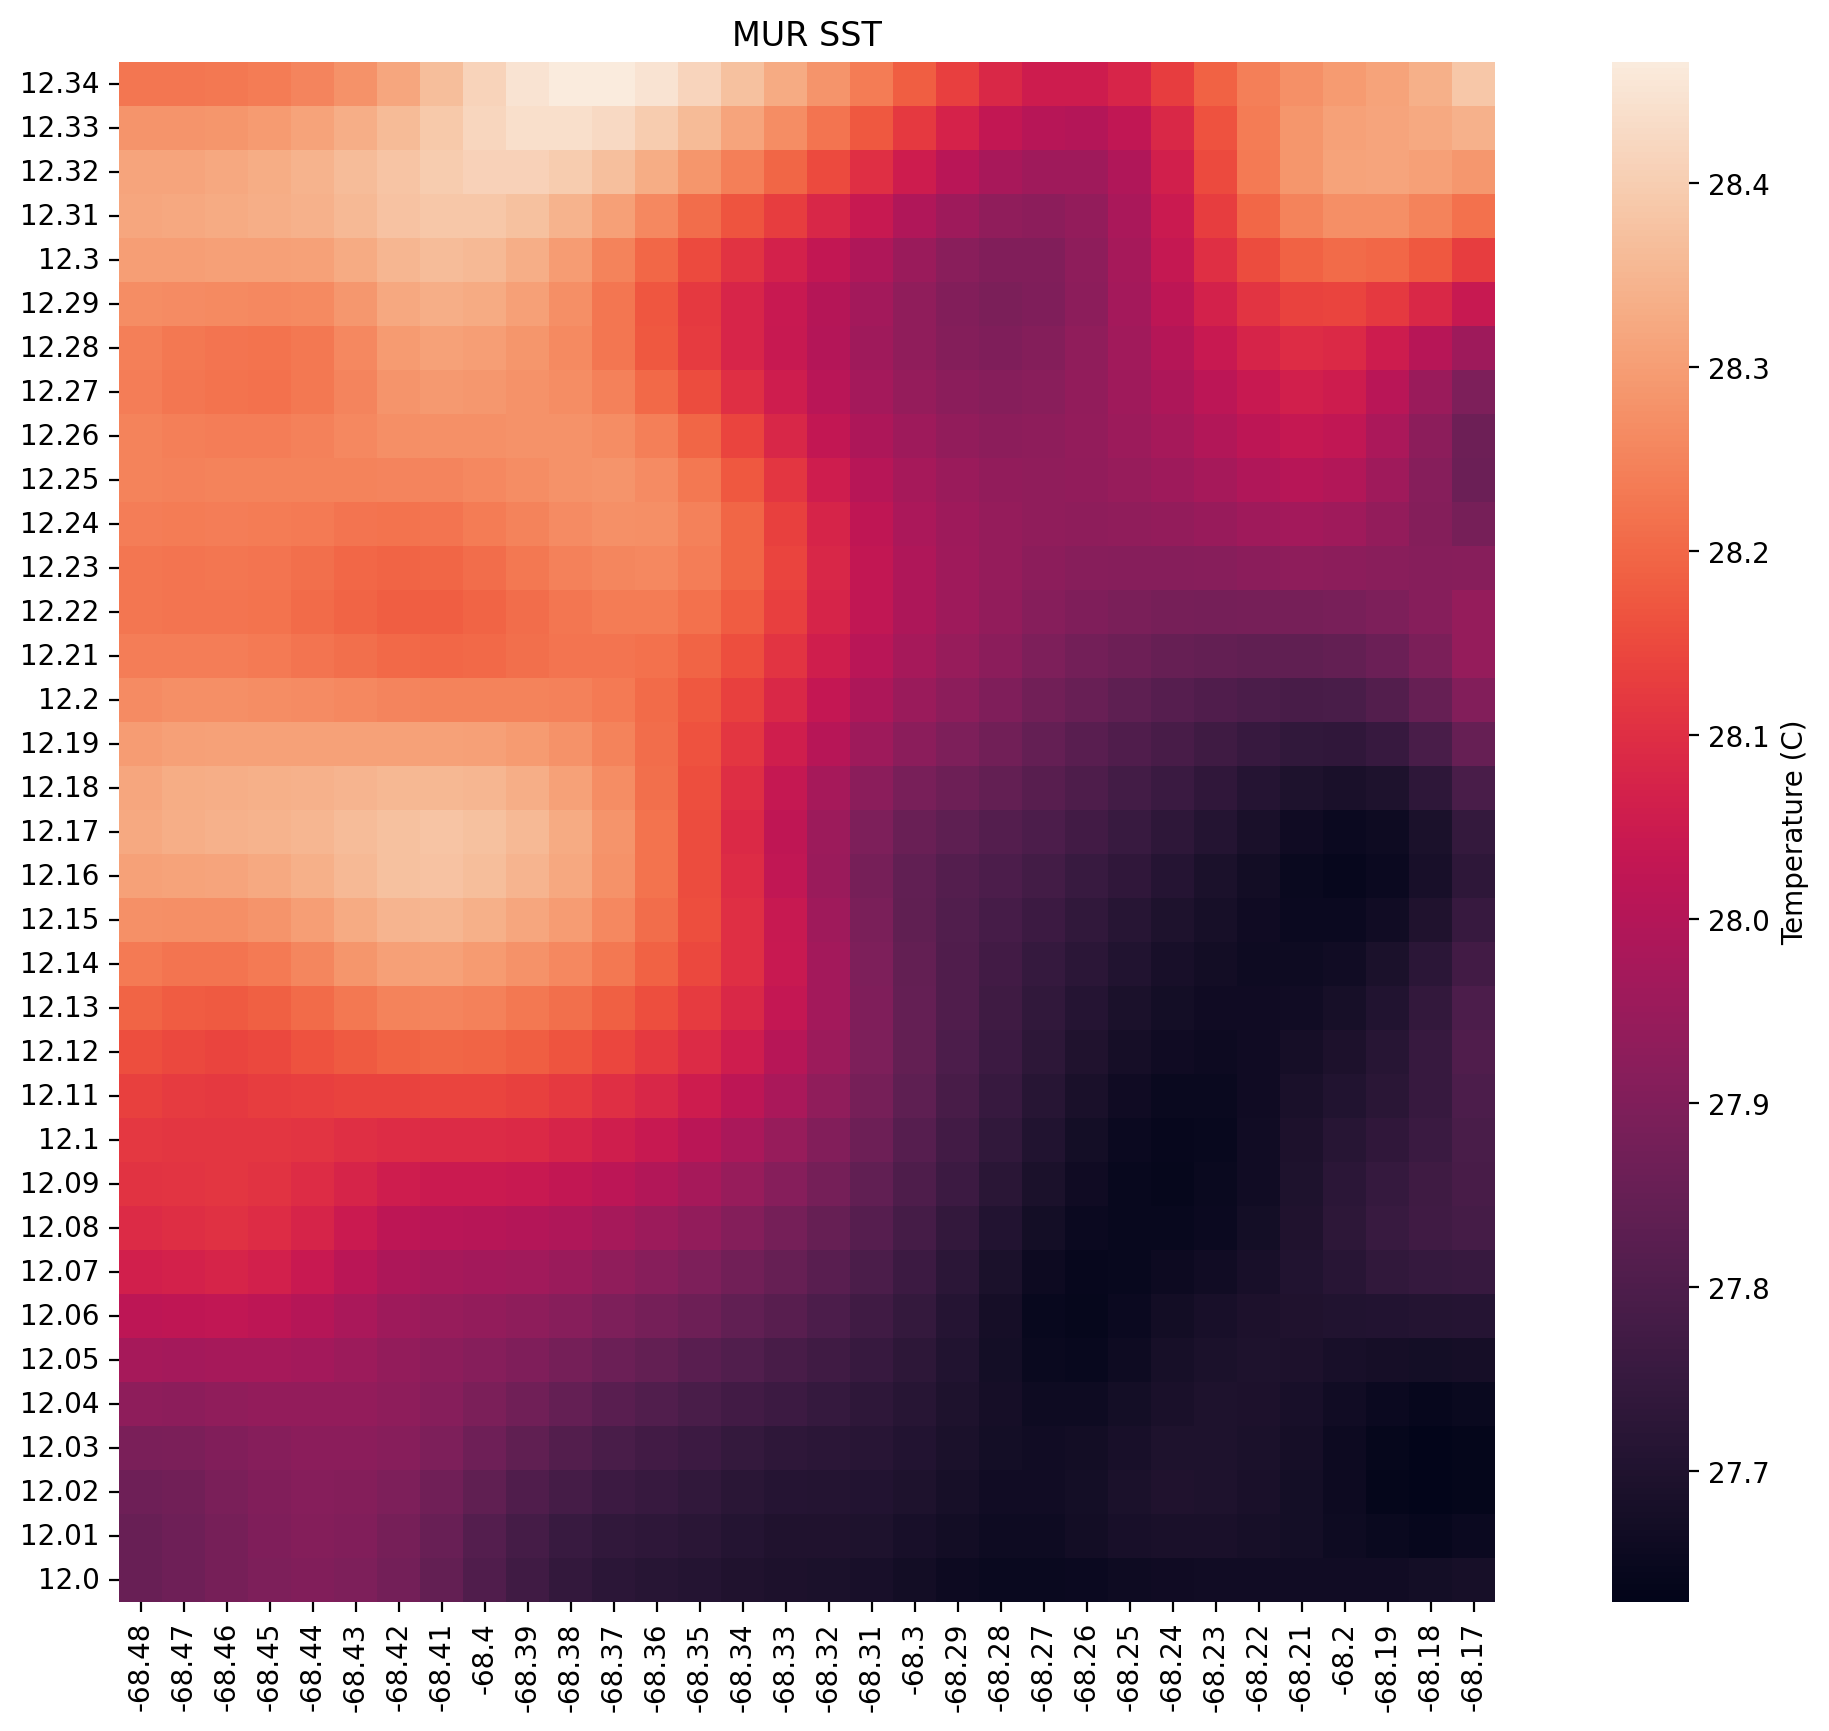

In [10]:
# Importing Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray
import cartopy.crs as ccrs

# Loads the data
nc = xr.open_dataset('sst.nc')

# Slices to show only data from 2010-05-05
nc = nc.sel(time='2010-05-05')

# Create plot with multiple subplots
fig, ax = plt.subplots(1,1, figsize=(15,10))

# Loads Shape File
shape = gpd.read_file('../shapeFiles/BON_Coastline.shp')

# Sets Label Ranges
x_range = np.arange(-68.48, -68.17, 0.01).round(2)
y_range = np.arange(12.0, 12.35, 0.01).round(2)[::-1]

# Sets Limits
ax.set_xlim(x_range.min(), x_range.max())
ax.set_ylim(y_range.min(), y_range.max())

# Sets the Title
ax.set_title('MUR SST')

# Sets Axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Generate the heatmap
sns.heatmap(nc.analysed_sst[0,:,:]-273.14, ax=ax, cbar_kws={'label': 'Temperature (C)'},
            xticklabels=x_range, yticklabels=y_range, zorder=3, alpha=1)

# Plots the Shape File
shape.plot(ax=ax, color='none', edgecolor='black', zorder=4)